In [1]:
import numpy as np
import copy
import math
import time
import random
import matplotlib.pyplot as plt

In [2]:

def getInitialBoard():
    board = np.zeros(shape=(8,8), dtype=int)

    board[0][1] = 2
    board[0][3] = 2
    board[0][5] = 2
    board[0][7] = 2

    board[1][0] = 2
    board[1][2] = 2
    board[1][4] = 2
    board[1][6] = 2

    board[2][1] = 2
    board[2][3] = 2
    board[2][5] = 2
    board[2][7] = 2


    board[5][0] = 1
    board[5][2] = 1
    board[5][4] = 1
    board[5][6] = 1

    board[6][1] = 1
    board[6][3] = 1
    board[6][5] = 1
    board[6][7] = 1

    board[7][0] = 1
    board[7][2] = 1
    board[7][4] = 1
    board[7][6] = 1
    
    return board

In [3]:


def evaluationFun(board,player):
    val,play=gameIsSolved(board)
    lengthTwo = np.count_nonzero(board == 2)
    lengthOne = np.count_nonzero(board == 1)
    lengthThree = np.count_nonzero(board == 3)
    lengthFour = np.count_nonzero(board == 4)

    lengthThree=lengthThree*5
    lengthFour=lengthFour*5
    if player==1:
        if val and play==1:
            return +100 
        elif val and play==2:
            return -100
        else:
            return lengthOne-lengthTwo+(lengthThree-lengthFour)
    else:
        if val and play==2:
            return +100
        elif val and play==1:
            return -100
        else:
            return lengthTwo-lengthOne+(lengthFour-lengthThree)

def isAttackValid(i,j,board,player,dir):
    if player==1:
        if dir=="LEFT":
            if isItInBounds(i-2,j-2) and board[i-2][j-2]==0:
                return True
        if dir=="RIGHT":
            if isItInBounds(i-2,j+2) and board[i-2][j+2]==0:
                return True
        pass
    elif player==2:
        if dir=="LEFT":
            if isItInBounds(i+2,j-2) and board[i+2][j-2]==0:
                return True
        if dir=="RIGHT":
            if isItInBounds(i+2,j+2) and board[i+2][j+2]==0:
                return True

'''
kings are presented as 4 for 2
and 3 for 1
black is 1
can be called firstVar,_ = gameIsSolved(board)
'''
def gameIsSolved(board):
    lengthTwo = np.count_nonzero(board == 2)
    lengthOne = np.count_nonzero(board == 1)
    lengthThree = np.count_nonzero(board == 3)
    lengthFour = np.count_nonzero(board == 4)

    if (lengthOne+lengthThree)==0:
        return True,2
    elif (lengthTwo+lengthFour)==0:
        return True,1
    else:
        return False,None


def isAttackAvailable(i,j,board,player):
    if player==1:
        # direction left
        if isItInBounds(i-1, j-1) and (board[i-1][j-1]==2 or board[i-1][j-1]==4)  and isItInBounds(i-2,j-2) and board[i-2][j-2]==0:
            return True
            
            
        # direction right
        if isItInBounds(i-1, j+1) and (board[i-1][j+1]==2 or board[i-1][j+1]==4)  and isItInBounds(i-2,j+2) and board[i-2][j+2]==0:
            return True
            
        
    elif player==2:
        # direction left
        if isItInBounds(i+1,j-1) and (board[i+1][j-1]==1 or board[i+1][j-1]==3)  and isItInBounds(i+2,j-2) and board[i+2][j-2]==0:
            return True
        

        # direction right
        if isItInBounds(i+1, j+1) and (board[i+1][j+1]==1 or board[i+1][j+1]==3) and isItInBounds(i+2,j+2) and board[i+2][j+2]==0:
            return True
    else:
        return False


def isItInBounds(i,j):
    if i>=0 and i<=7 and j>=0 and j<=7:
        return True
    else:
        return False

'''def isThereAnAttackOnBoard(board, player):
    for i in range(8):
        for j in range(8):
            if board[i][j]  == 1: # player one
                listOfAttacks=isAttackAvailable(i,j,board,1)
                if listOfAttacks != []:
                    if player == 1:
                        return True
                
            elif board[i][j] == 2: # player two
                listOfAttacks=isAttackAvailable(i,j,board,2)
                if listOfAttacks != []:
                    if player == 2:
                        return True
    
    return False
'''

def whereIsTheAttack(i,j,board, player):
    attacks = []

    if player==2:
        if isItInBounds(i+1,j-1) and (board[i+1][j-1] == 1 or board[i+1][j-1] == 3) and isAttackValid(i,j,board,2,"LEFT"):
            attacks.append("LEFT")
        if  isItInBounds(i+1,j+1) and (board[i+1][j+1]==1 or board[i+1][j+1]==3) and isAttackValid(i,j,board,2,"RIGHT"):
            attacks.append("RIGHT")
        return attacks
    elif player==1:
            if isItInBounds(i-1,j-1) and (2 == board[i-1][j-1] or 4 == board[i-1][j-1]) and isAttackValid(i,j,board,1,"LEFT"):
                attacks.append("LEFT")
            if isItInBounds(i-1,j+1) and (2 == board[i-1][j+1] or 4 == board[i-1][j+1]) and isAttackValid(i,j,board,1,"RIGHT"):
                attacks.append("RIGHT")
    return attacks


'''
after movement
'''
def canWeQueen(i,player):
    if player==1:
        if i==0:
            return True
        else:
            return False
    elif player==2:
        if i==7:
            return True
        else:
            return False
    else:
        return False


def getDiagonals(x,y,board):
    upLeft=[]
    upRight = []
    downLeft = []
    downRight = []

    newX = x+1
    newY = y+1
    while isItInBounds(newX,newY):
        downRight.append(board[newX][newY])
        newX = newX+1
        newY = newY+1

    newX = x+1
    newY = y-1
    while isItInBounds(newX,newY):

        downLeft.append(board[newX][newY])
        newX = newX+1
        newY = newY-1
    
    newX = x-1
    newY = y+1
    while isItInBounds(newX,newY):
        upRight.append(board[newX][newY])
        newX = newX-1
        newY = newY+1
    
    newX = x-1
    newY = y-1
    while isItInBounds(newX,newY):
        upLeft.append(board[newX][newY])
        newX = newX-1
        newY = newY-1

    varDouble = False
    counter=0
    upLeftSec = []
    for i in upLeft:
        if varDouble and i!=0:
            upLeftSec.pop(len(upLeftSec)-1)
            upLeft = upLeftSec
            break

        upLeftSec.append(i)
        if i !=0:
            varDouble=True
        else:
            varDouble=False
        counter=counter+1

    varDouble = False
    counter=0
    upRightSec = []
    for i in upRight:
        if varDouble and i!=0:
            upRightSec.pop(len(upRightSec)-1)
            upRight= upRightSec
            break
        
        upRightSec.append(i)
        if i !=0:
            varDouble=True
        else:
            varDouble=False
        counter=counter+1

    varDouble = False
    counter=0
    downLeftSec = []
    for i in downLeft:
        if varDouble and i!=0:
            downLeftSec.pop(len(downLeftSec)-1)
            downLeft= downLeftSec
            break
        downLeftSec.append(i)
        if i !=0:
            varDouble=True
        else:
            varDouble=False
        counter=counter+1

    varDouble = False
    counter=0
    downRightSec= []
    for i in downRight:
        if varDouble and i !=0:
            downRightSec.pop(len(downRightSec)-1)
            downRight= downRightSec
            break
        downRightSec.append(i)
        if i !=0:
            varDouble=True
        else:
            varDouble=False
        counter=counter+1 

    return {
        'up_left' : upLeft,
        'up_right' : upRight,
        'dw_left' : downLeft,
        'dw_right' : downRight
    }

def isAttackAvailableQueen(i,j,board,player):
    if not isItInBounds(i,j):
        return [],False
    
    if (board[i][j]==4 and player==2):
        pass
    elif (board[i][j]==3 and player==1):
        pass
    else:
        return [],False

    newDict = getDiagonals(i,j,board)
    del newDict['up_left'][len(newDict['up_left'])-1:]
    del newDict['up_right'][len(newDict['up_right'])-1:]
    del newDict['dw_left'][len(newDict['dw_left'])-1:]
    del newDict['dw_right'][len(newDict['dw_right'])-1:]


    listoua = []

    if player==1:
        if (newDict['up_left'].count(2) > 0 or newDict['up_left'].count(4) > 0):
            listoua.append(("up_left",newDict["up_left"]))
        if (newDict['up_right'].count(2) > 0 or newDict['up_right'].count(4) > 0):
            listoua.append(("up_right", newDict["up_right"]))
        if (newDict['dw_left'].count(2) > 0 or newDict['dw_left'].count(4) > 0):
            listoua.append(("dw_left", newDict["dw_left"]))
        if (newDict['dw_right'].count(2) > 0 or newDict['dw_right'].count(4) > 0):
            listoua.append(("dw_right", newDict["dw_right"]))
    elif player==2:
        if (newDict['up_left'].count(3) > 0 or newDict['up_left'].count(1) > 0):
            listoua.append(("up_left", newDict["up_left"]))
        if (newDict['up_right'].count(3) > 0 or newDict['up_right'].count(1) > 0):
            listoua.append(("up_right", newDict["up_right"]))
        if (newDict['dw_left'].count(3) > 0 or newDict['dw_left'].count(1) > 0):
            listoua.append(("dw_left", newDict["dw_left"]))
        if (newDict['dw_right'].count(3) > 0 or newDict['dw_right'].count(1) > 0):
            listoua.append(("dw_right", newDict["dw_right"]))
    else: 
        return False

    if listoua!=[]:
        return listoua,True
    else:
        return [],False

In [13]:
def move(player,board):
    bestScore = -math.inf
    moves = getPossibleMoves(player, board)
    moveloc = moves[0]
    for position in moves:
        if player==1:
            score = alphabeta(position, 2, -math.inf, math.inf, True, 1,1)
        elif player==2: 
            score = alphabeta(position, 1, -math.inf, math.inf, True, 2,2)
        if score > bestScore:
            bestScore = score
            moveLoc = position
    return moveLoc

'''
initial call:
minimax(currentPosition, 3, -∞, +∞, true)
'''
def alphabeta(board,depth,alpha,beta,maxPlayer, player, initialPlayer):
    smallBool,_ = gameIsSolved(board)
    if smallBool or depth==0:
        return evaluationFun(board,initialPlayer)
        
    if player==1:
        player=2
    elif player==2:
        player=1

    if maxPlayer:
        bestValue = -math.inf
        for move in getPossibleMoves(player,board):
            value = alphabeta(move,depth-1,alpha,beta, False, player,initialPlayer)
            bestValue = max(bestValue,value)
            alpha = max(alpha, value)
            if beta <= alpha:
                break
        return bestValue
        
    else:
        smallValue = math.inf
        for move in getPossibleMoves(player,board):
            value = alphabeta(move,depth-1,alpha,beta, True, player,initialPlayer)
            smallValue = min(smallValue,value)
            beta = min(beta, value)
            if beta <= alpha:
                break
        return smallValue

def printBoard(board,player):
    colorMap = {
        0: np.array([255,255,255]),
        3: np.array([117,72,72]),
        1: np.array([255,0,0]),
        2: np.array([251,255,0]),
        4: np.array([124,125,76])
    }

    threeDArr = np.ndarray(shape=(board.shape[0], board.shape[1], 3), dtype=int)
    for i in range(0, board.shape[0]):
        for j in range(0, board.shape[1]):
            threeDArr[i][j] = colorMap[board[i][j]]

    
    fig, ax = plt.subplots(1,1)
    ax.imshow(threeDArr)
    for i in range(0, board.shape[0]):
        for j in range(0, board.shape[1]):
            c = board[j,i]
            ax.text(i, j, str(c), va='center', ha='center')
    
    plt.title("player=%i" %player)
    plt.show()
    '''plt.imshow(board)
    plt.title("player=%i" %player)
    plt.show()'''


def startGame():
    board = getInitialBoard()
    # create player objects
    player = 1
    while(True):
        printBoard(board,player)
        start = time.time()
        board = move(player,board)
        print("Time took for each move:",round(time.time()-start,6))
        boolis, playerWon = gameIsSolved(board)
        if boolis:
            print(playerWon, "Won!")
            printBoard(board,player)
            break
        if player==1:
            player=2
        elif player==2:
            player=1

In [5]:
def getPossibleMoves(player,board):
    moves = []
    if player==1:
        for x in range(8):
            for y in range(8):
                if board[x][y]==1:
                    if not isAttackAvailable(x,y,board,1):
                        # left
                        if isItInBounds(x-1,y-1) and board[x-1][y-1]==0:
                                edit = copy.deepcopy(board)
                                edit[x][y]=0
                                edit[x-1][y-1]=1
                                if canWeQueen(x-1,1):
                                    edit[x-1][y-1]=3
                                    moves.append(edit)
                                else:
                                    moves.append(edit)

                        # right
                        if isItInBounds(x-1,y+1) and board[x-1][y+1]==0:
                                edit = copy.deepcopy(board)
                                edit[x][y]=0
                                edit[x-1][y+1]=1
                                if canWeQueen(x-1,1):
                                    edit[x-1][y+1]=3
                                    moves.append(edit)
                                else:
                                    moves.append(edit)
                    else:
                        # there is an attack
                        directionList = whereIsTheAttack(x,y,board,1)
                        for dir in directionList:
                            if dir=="LEFT":
                                # first jump left
                                copyBoard = copy.deepcopy(board)
                                copyBoard[x][y]=0
                                copyBoard[x-1][y-1]=0
                                copyBoard[x-2][y-2]=1
                                newX,newY = x-2,y-2
                                if isAttackAvailable(newX,newY,copyBoard,1):
                                    firstLeftdirectionList = whereIsTheAttack(newX,newY,copyBoard,1)
                                    for firstLeftDir in firstLeftdirectionList:
                                        if firstLeftDir == "LEFT":
                                            # second attack left
                                            firstLeftBoard = copy.deepcopy(copyBoard)
                                            firstLeftBoard[newX][newY]=0
                                            firstLeftBoard[newX-1][newY-1]=0
                                            firstLeftBoard[newX-2][newY-2]=1
                                            firstLeftX,firstLeftY = newX-2, newY-2
                                            if isAttackAvailable(firstLeftX,firstLeftY,firstLeftBoard,1):
                                                secondLeftDirectionList = whereIsTheAttack(firstLeftX,firstLeftY,firstLeftBoard,1)
                                                for secondLeftDir in secondLeftDirectionList:
                                                    if secondLeftDir == "LEFT":
                                                        # third left
                                                        secondLeftBoard = copy.deepcopy(firstLeftBoard)
                                                        secondLeftBoard[firstLeftX][firstLeftY]=0
                                                        secondLeftBoard[firstLeftX-1][firstLeftY-1]=0
                                                        secondLeftBoard[firstLeftX-2][firstLeftY-2]=1
                                                        moves.append(secondLeftBoard)
                                                    else:
                                                        # third right
                                                        secondLeftBoard = copy.deepcopy(firstLeftBoard)
                                                        secondLeftBoard[firstLeftX][firstLeftY]=0
                                                        secondLeftBoard[firstLeftX-1][firstLeftY+1]=0
                                                        secondLeftBoard[firstLeftX-2][firstLeftY+2]=1
                                                        moves.append(secondLeftBoard)
                                            else:
                                                moves.append(firstLeftBoard)
                                        else:
                                            #second attack right
                                            firstRightBoard = copy.deepcopy(copyBoard)
                                            firstRightBoard[newX][newY]=0
                                            firstRightBoard[newX-1][newY+1]=0
                                            firstRightBoard[newX-2][newY+2]=1
                                            firstLeftX,firstLeftY = newX-2, newY+2
                                            if isAttackAvailable(firstLeftX,firstLeftY,firstRightBoard,1):
                                                secondLeftDirectionList = whereIsTheAttack(firstLeftX,firstLeftY,firstRightBoard,1)
                                                for secondLeftDir in secondLeftDirectionList:
                                                    if secondLeftDir == "LEFT":
                                                        # third left
                                                        secondLeftBoard = copy.deepcopy(firstRightBoard)
                                                        secondLeftBoard[firstLeftX][firstLeftY]=0
                                                        secondLeftBoard[firstLeftX-1][firstLeftY-1]=0
                                                        secondLeftBoard[firstLeftX-2][firstLeftY-2]=1
                                                        moves.append(secondLeftBoard)
                                                    else:
                                                        # third right
                                                        secondLeftBoard = copy.deepcopy(firstRightBoard)
                                                        secondLeftBoard[firstLeftX][firstLeftY]=0
                                                        secondLeftBoard[firstLeftX-1][firstLeftY+1]=0
                                                        secondLeftBoard[firstLeftX-2][firstLeftY+2]=1
                                                        moves.append(secondLeftBoard)
                                            else:
                                                moves.append(firstRightBoard)
                                else:
                                    moves.append(copyBoard)
                            else:
                                # first jump right
                                copyBoard = copy.deepcopy(board)
                                copyBoard[x][y]=0
                                copyBoard[x-1][y+1]=0
                                copyBoard[x-2][y+2]=1
                                newX,newY = x-2,y+2
                                if isAttackAvailable(newX,newY,copyBoard,1):
                                    firstLeftdirectionList = whereIsTheAttack(newX,newY,copyBoard,1)
                                    for firstLeftDir in firstLeftdirectionList:
                                        if firstLeftDir == "LEFT":
                                            # second attack left
                                            firstLeftBoard = copy.deepcopy(copyBoard)
                                            firstLeftBoard[newX][newY]=0
                                            firstLeftBoard[newX-1][newY-1]=0
                                            firstLeftBoard[newX-2][newY-2]=1
                                            firstLeftX,firstLeftY = newX-2, newY-2
                                            if isAttackAvailable(firstLeftX,firstLeftY,firstLeftBoard,1):
                                                firstLeftdirectionList = whereIsTheAttack(firstLeftX,firstLeftY,firstLeftBoard,1)
                                                for firstLeftDir in firstLeftdirectionList:
                                                    if firstLeftDir == "LEFT":
                                                        #third left
                                                        secondLeftBoard = copy.deepcopy(firstLeftBoard)
                                                        secondLeftBoard[firstLeftX][firstLeftY]=0
                                                        secondLeftBoard[firstLeftX-1][firstLeftY-1]=0
                                                        secondLeftBoard[firstLeftX-2][firstLeftY-2]=1
                                                        moves.append(secondLeftBoard)
                                                    else:
                                                        # third right
                                                        secondLeftBoard = copy.deepcopy(firstLeftBoard)
                                                        secondLeftBoard[firstLeftX][firstLeftY]=0
                                                        secondLeftBoard[firstLeftX-1][firstLeftY+1]=0
                                                        secondLeftBoard[firstLeftX-2][firstLeftY+2]=1
                                                        moves.append(secondLeftBoard)
                                            else:
                                                moves.append(firstLeftBoard)
                                        else:
                                            #second attack right
                                            firstRightBoard = copy.deepcopy(copyBoard)
                                            firstRightBoard[newX][newY]=0
                                            firstRightBoard[newX-1][newY+1]=0
                                            firstRightBoard[newX-2][newY+2]=1
                                            firstLeftX,firstLeftY = newX-2, newY+2
                                            if isAttackAvailable(firstLeftX,firstLeftY,firstRightBoard,1):
                                                firstLeftdirectionList = whereIsTheAttack(firstLeftX,firstLeftY,firstRightBoard,1)
                                                for firstLeftDir in firstLeftdirectionList:
                                                    if firstLeftDir == "LEFT":
                                                        #third left
                                                        secondLeftBoard = copy.deepcopy(firstRightBoard)
                                                        secondLeftBoard[firstLeftX][firstLeftY]=0
                                                        secondLeftBoard[firstLeftX-1][firstLeftY-1]=0
                                                        secondLeftBoard[firstLeftX-2][firstLeftY-2]=1
                                                        moves.append(secondLeftBoard)
                                                    else:
                                                        # third right
                                                        secondLeftBoard = copy.deepcopy(firstRightBoard)
                                                        secondLeftBoard[firstLeftX][firstLeftY]=0
                                                        secondLeftBoard[firstLeftX-1][firstLeftY+1]=0
                                                        secondLeftBoard[firstLeftX-2][firstLeftY+2]=1
                                                        moves.append(secondLeftBoard)
                                            else:
                                                moves.append(firstRightBoard)
                                else:
                                    moves.append(copyBoard)
                elif board[x][y]==3:
                    direction,boolis = isAttackAvailableQueen(x,y,board,1)
                    upLeft=[]
                    upRight = []
                    downLeft = []
                    downRight = []
                    newX = x+1
                    newY = y+1
                    while isItInBounds(newX,newY) and board[newX][newY]==0:
                        movementBoard = copy.deepcopy(board)
                        movementBoard[x][y]=0
                        movementBoard[newX][newY]=3
                        downRight.append(movementBoard)
                        newX = newX+1
                        newY = newY+1
                    newX,newY=x,y
                    newX = x+1
                    newY = y-1
                    while isItInBounds(newX,newY) and board[newX][newY]==0:
                        movementBoard = copy.deepcopy(board)
                        movementBoard[x][y]=0
                        movementBoard[newX][newY]=3
                        downLeft.append(movementBoard)
                        newX = newX+1
                        newY = newY-1
                    newX,newY=x,y
                    newX = x-1
                    newY = y+1
                    while isItInBounds(newX,newY) and board[newX][newY]==0:
                        movementBoard = copy.deepcopy(board)
                        movementBoard[x][y]=0
                        movementBoard[newX][newY]=3
                        upRight.append(movementBoard)
                        newX = newX-1
                        newY = newY+1
                    newX,newY=x,y
                    newX = x-1
                    newY = y-1
                    while isItInBounds(newX,newY) and board[newX][newY]==0:
                        movementBoard = copy.deepcopy(board)
                        movementBoard[x][y]=0
                        movementBoard[newX][newY]=3
                        upLeft.append(movementBoard)
                        newX = newX-1
                        newY = newY-1
                    
                    for a in upLeft:
                        moves.append(a)
                    for a in upRight:
                        moves.append(a)
                    for a in downLeft:
                        moves.append(a)
                    for a in downRight:
                        moves.append(a)
                    # so we know we can attack
                    # we have the list of the attack 
                    if boolis==True:
                        for ggg in direction:
                            if ggg[0] == "up_right":
                                summ=0
                                for randomS in ggg[1]:
                                    if randomS==2 or randomS==4:
                                        summ=summ+1
                                        break
                                    else:
                                        summ=summ+1

                                
                                miniBoard = copy.deepcopy(board)
                                newX = x-summ
                                newY = y+summ
                                miniBoard[x][y]=0
                                miniBoard[newX][newY]=0
                                miniBoard[newX-1][newY+1]=3
                                brandNewX, brandNewY = newX-1,newY+1
                                newDir, newBoolis = isAttackAvailableQueen(brandNewX,brandNewY,miniBoard,1)
                                if newBoolis:
                                    newNewBoard = recursiveAttackQueen(brandNewX,brandNewY,miniBoard,1,newDir)
                                    moves.append(newNewBoard)
                                else:
                                    moves.append(miniBoard)
                                
                            elif ggg[0] == "up_left":
                                summ=0
                                for randomS in ggg[1]:
                                    if randomS==2 or randomS==4:
                                        summ=summ+1
                                        break
                                    else:
                                        summ=summ+1
                                    
                                miniBoard = copy.deepcopy(board)
                                newX = x-summ
                                newY = y-summ
                                miniBoard[x][y]=0
                                miniBoard[newX][newY]=0
                                miniBoard[newX-1][newY-1]=3
                                brandNewX, brandNewY = newX-1,newY-1
                                newDir, newBoolis = isAttackAvailableQueen(brandNewX,brandNewY,miniBoard,1)
                                if newBoolis:
                                    newNewBoard = recursiveAttackQueen(brandNewX,brandNewY,miniBoard,1,newDir)
                                    moves.append(newNewBoard)
                                else:
                                    moves.append(miniBoard)

                            elif ggg[0] == "dw_right":
                                summ=0
                                for randomS in ggg[1]:
                                    if randomS==2 or randomS==4:
                                        summ=summ+1
                                        break
                                    else:
                                        summ=summ+1
                                
                                miniBoard = copy.deepcopy(board)
                                newX = x+summ
                                newY = y+summ
                                miniBoard[x][y]=0
                                miniBoard[newX][newY]=0
                                miniBoard[newX+1][newY+1]=3
                                brandNewX, brandNewY = newX+1,newY+1
                                newDir, newBoolis = isAttackAvailableQueen(brandNewX,brandNewY,miniBoard,1)
                                if newBoolis:
                                    newNewBoard = recursiveAttackQueen(brandNewX,brandNewY,miniBoard,1,newDir)
                                    moves.append(newNewBoard)
                                else:
                                    moves.append(miniBoard)

                            elif ggg[0] == "dw_left":
                                summ=0
                                for randomS in ggg[1]:
                                    if randomS==2 or randomS==4:
                                        summ=summ+1
                                        break
                                    else:
                                        summ=summ+1

                                miniBoard = copy.deepcopy(board)
                                newX = x+summ
                                newY = y-summ
                                miniBoard[x][y]=0
                                miniBoard[newX][newY]=0
                                miniBoard[newX+1][newY-1]=3
                                brandNewX, brandNewY = newX+1,newY-1
                                newDir, newBoolis = isAttackAvailableQueen(brandNewX,brandNewY,miniBoard,1)
                                if newBoolis:
                                    newNewBoard = recursiveAttackQueen(brandNewX,brandNewY,miniBoard,1,newDir)
                                    moves.append(newNewBoard)
                                else:
                                    moves.append(miniBoard)
    elif player==2:
        for x in range(8):
            for y in range(8):
                if board[x][y]==2:
                    if not isAttackAvailable(x,y,board,2):
                        # left
                        if isItInBounds(x+1,y-1) and board[x+1][y-1]==0:
                            edit = copy.deepcopy(board)
                            edit[x][y]=0
                            edit[x+1][y-1]=2
                            if canWeQueen(x+1,2):
                                edit[x+1][y-1]=4
                                moves.append(edit)
                            else:
                                moves.append(edit)
                        # right
                        if isItInBounds(x+1,y+1) and board[x+1][y+1]==0:
                            edit= copy.deepcopy(board)
                            edit[x][y]=0
                            edit[x+1][y+1]=2
                            if canWeQueen(x+1,2):
                                edit[x+1][y+1]=4
                                moves.append(edit)
                            else:
                                moves.append(edit)
                    else:
                        # there is an attack
                        directionList = whereIsTheAttack(x,y,board,2)
                        for dir in directionList:
                            if dir=="LEFT":
                                # first jump left
                                copyBoard = copy.deepcopy(board)
                                copyBoard[x][y]=0
                                copyBoard[x+1][y-1]=0
                                copyBoard[x+2][y-2]=2
                                newX,newY = x+2, y-2
                                if isAttackAvailable(newX,newY,copyBoard,2):
                                    firstLeftdirectionList = whereIsTheAttack(newX,newY,copyBoard,2)
                                    for secondDirection in firstLeftdirectionList:
                                        if secondDirection == "LEFT":
                                            # second
                                            newBoardSec = copy.deepcopy(copyBoard)
                                            newBoardSec[newX][newY]=0
                                            newBoardSec[newX+1][newY-1]=0
                                            newBoardSec[newX+2][newY-2]=2
                                            firstRightX,firstRightY = newX+2, newY-2
                                            if isAttackAvailable(firstRightX,firstRightY,newBoardSec,2):
                                                secondLeftDirectionList = whereIsTheAttack(firstRightX,firstRightY,newBoardSec,2)
                                                for SLD in secondLeftDirectionList:
                                                    if SLD=="LEFT":
                                                        # third
                                                        newBoardThird = copy.deepcopy(newBoardSec)
                                                        newBoardThird[newX][newY]=0
                                                        newBoardThird[newX+1][newY-1]=0
                                                        newBoardThird[newX+2][newY-2]=2
                                                        moves.append(newBoardThird)
                                                    else:
                                                        # third
                                                        newBoardThird = copy.deepcopy(newBoardSec)
                                                        newBoardThird[x][y]=0
                                                        newBoardThird[x+1][y+1]=0
                                                        newBoardThird[x+2][y+2]=2
                                                        moves.append(newBoardThird)
                                            else:
                                                moves.append(newBoardSec)
                                        else:
                                            #second
                                            newBoardSec = copy.deepcopy(copyBoard)
                                            newBoardSec[newX][newY]=0
                                            newBoardSec[newX+1][newY+1]=0
                                            newBoardSec[newX+2][newY+2]=2
                                            firstRightX,firstRightY = newX+2, newY+2
                                            if isAttackAvailable(firstRightX,firstRightY,newBoardSec,2):
                                                secondLeftDirectionList = whereIsTheAttack(firstRightX,firstRightY,newBoardSec,2)
                                                for SLD in secondLeftDirectionList:
                                                    if SLD=="LEFT":
                                                        # third
                                                        newBoardThird = copy.deepcopy(newBoardSec)
                                                        newBoardThird[firstRightX][firstRightY]=0
                                                        newBoardThird[firstRightX+1][firstRightY-1]=0
                                                        newBoardThird[firstRightX+2][firstRightY-2]=2
                                                        moves.append(newBoardThird)
                                                    else:
                                                        # third
                                                        newBoardThird = copy.deepcopy(newBoardSec)
                                                        newBoardThird[firstRightX][firstRightY]=0
                                                        newBoardThird[firstRightX+1][firstRightY+1]=0
                                                        newBoardThird[firstRightX+2][firstRightY+2]=2
                                                        moves.append(newBoardThird)
                                            else:
                                                moves.append(newBoardSec)

                                else:
                                    moves.append(copyBoard)
                            else:
                                # first jump right
                                copyBoard = copy.deepcopy(board)
                                copyBoard[x][y]=0
                                copyBoard[x+1][y+1]=0
                                copyBoard[x+2][y+2]=2
                                newX,newY = x+2,y+2
                                if isAttackAvailable(newX,newY,copyBoard,2):
                                    firstRightBoard = whereIsTheAttack(newX,newY,copyBoard,2)
                                    for FRB in firstRightBoard:
                                        if FRB=="LEFT":
                                            # second
                                            secondBoard = copy.deepcopy(copyBoard)
                                            secondBoard[newX][newY]=0
                                            secondBoard[newX+1][newY-1]=0
                                            secondBoard[newX+2][newY-2]=2
                                            secondRightX,secondRightY = newX+2,newY-2
                                            if isAttackAvailable(secondRightX,secondRightY,secondBoard,2):
                                                newSecondList = whereIsTheAttack(secondRightX,secondRightY,secondBoard,2)
                                                for NSL in newSecondList:
                                                    if NSL=="LEFT":
                                                        # third
                                                        thirdBoard = copy.deepcopy(secondBoard)
                                                        thirdBoard[secondRightX][secondRightY]=0
                                                        thirdBoard[secondRightX+1][secondRightY-1]=0
                                                        thirdBoard[secondRightX+2][secondRightY-2]=2
                                                        moves.append(thirdBoard)
                                                    else:
                                                        # third
                                                        thirdBoard = copy.deepcopy(secondBoard)
                                                        thirdBoard[secondRightX][secondRightY]=0
                                                        thirdBoard[secondRightX+1][secondRightY+1]=0
                                                        thirdBoard[secondRightX+2][secondRightY+2]=2
                                                        moves.append(thirdBoard)
                                            else:
                                                moves.append(secondBoard)
                                        else:
                                            # second
                                            secondBoard = copy.deepcopy(copyBoard)
                                            secondBoard[newX][newY]=0
                                            secondBoard[newX+1][newY+1]=0
                                            secondBoard[newX+2][newY+2]=2
                                            secondRightX,secondRightY = newX+2,newY+2
                                            if isAttackAvailable(secondRightX,secondRightY,secondBoard,2):
                                                newSecondList = whereIsTheAttack(secondRightX,secondRightY,secondBoard,2)
                                                for NSL in newSecondList:
                                                    if NSL=="LEFT":
                                                        # third
                                                        thirdBoard = copy.deepcopy(secondBoard)
                                                        thirdBoard[secondRightX][secondRightY]=0
                                                        thirdBoard[secondRightX+1][secondRightY-1]=0
                                                        thirdBoard[secondRightX+2][secondRightY-2]=2
                                                        moves.append(thirdBoard)
                                                    else:
                                                        # third
                                                        thirdBoard = copy.deepcopy(secondBoard)
                                                        thirdBoard[secondRightX][secondRightY]=0
                                                        thirdBoard[secondRightX+1][secondRightY+1]=0
                                                        thirdBoard[secondRightX+2][secondRightY+2]=2
                                                        moves.append(thirdBoard)
                                            else:
                                                moves.append(secondBoard)
                                else:
                                    moves.append(copyBoard)
                elif board[x][y]==4:
                    direction,boolis = isAttackAvailableQueen(x,y,board,2)
                    upLeft=[]
                    upRight = []
                    downLeft = []
                    downRight = []
                    newX = x+1
                    newY = y+1
                    while isItInBounds(newX,newY) and board[newX][newY]==0:
                        movementBoard = copy.deepcopy(board)
                        movementBoard[x][y]=0
                        movementBoard[newX][newY]=4
                        downRight.append(movementBoard)
                        newX = newX+1
                        newY = newY+1


                    newX = x+1
                    newY = y-1
                    while isItInBounds(newX,newY) and board[newX][newY]==0:
                        movementBoard = copy.deepcopy(board)
                        movementBoard[x][y]=0
                        movementBoard[newX][newY]=4
                        downLeft.append(movementBoard)
                        newX = newX+1
                        newY = newY-1
                    

                    newX = x-1
                    newY = y+1
                    while isItInBounds(newX,newY) and board[newX][newY]==0:
                        movementBoard = copy.deepcopy(board)
                        movementBoard[x][y]=0
                        movementBoard[newX][newY]=4
                        upRight.append(movementBoard)
                        newX = newX-1
                        newY = newY+1
                    
                    newX = x-1
                    newY = y-1
                    while isItInBounds(newX,newY) and board[newX][newY]==0:
                        movementBoard = copy.deepcopy(board)
                        movementBoard[x][y]=0
                        movementBoard[newX][newY]=4
                        upLeft.append(movementBoard)
                        newX = newX-1
                        newY = newY-1
                    
                    for a in upLeft:
                        moves.append(a)
                    for a in upRight:
                        moves.append(a)
                    for a in downLeft:
                        moves.append(a)
                    for a in downRight:
                        moves.append(a)
                    # so we know we can attack
                    # we have the list of the attack 
                    if boolis==True:
                        for ggg in direction:
                            if ggg[0] == "up_right":
                                summ=0
                                for randomS in ggg[1]:
                                    if randomS==1 or randomS==3:
                                        summ=summ+1
                                        break
                                    else:
                                        summ=summ+1

                                
                                miniBoard = copy.deepcopy(board)
                                newX = x-summ
                                newY = y+summ
                                miniBoard[x][y]=0
                                miniBoard[newX][newY]=0
                                miniBoard[newX-1][newY+1]=4
                                brandNewX, brandNewY = newX-1,newY+1
                                newDir,newBoolis = isAttackAvailableQueen(brandNewX,brandNewY,miniBoard,2)
                                if newBoolis:
                                    newNewBoard = recursiveAttackQueen(brandNewX,brandNewY,miniBoard,2,newDir)
                                    moves.append(newNewBoard)
                                else:
                                    moves.append(miniBoard)

                            elif ggg[0] == "up_left":
                                summ=0
                                for randomS in ggg[1]:
                                    if randomS==1 or randomS==3:
                                        summ=summ+1
                                        break
                                    else:
                                        summ=summ+1
                                

                                miniBoard = copy.deepcopy(board)
                                newX = x-summ
                                newY = y-summ
                                miniBoard[x][y]=0
                                miniBoard[newX][newY]=0
                                miniBoard[newX-1][newY-1]=4
                                brandNewX, brandNewY = newX-1,newY-1
                                newDir,newBoolis = isAttackAvailableQueen(brandNewX,brandNewY,miniBoard,2)
                                if newBoolis:
                                    newNewBoard = recursiveAttackQueen(brandNewX,brandNewY,miniBoard,2,newDir)
                                    moves.append(newNewBoard)
                                else:
                                    moves.append(miniBoard)
                            elif ggg[0] == "dw_right":
                                summ=0
                                for randomS in ggg[1]:
                                    if randomS==1 or randomS==3:
                                        summ=summ+1
                                        break
                                    else:
                                        summ=summ+1
                                
                                miniBoard = copy.deepcopy(board)
                                newX = x+summ
                                newY = y+summ
                                miniBoard[x][y]=0
                                miniBoard[newX][newY]=0
                                miniBoard[newX+1][newY+1]=4
                                brandNewX, brandNewY = newX+1,newY+1
                                newDir,newBoolis = isAttackAvailableQueen(brandNewX,brandNewY,miniBoard,2)
                                if newBoolis:
                                    newNewBoard = recursiveAttackQueen(brandNewX,brandNewY,miniBoard,2,newDir)
                                    moves.append(newNewBoard)
                                else:
                                    moves.append(miniBoard)
                            elif ggg[0] == "dw_left":
                                summ=0
                                for randomS in ggg[1]:
                                    if randomS==1 or randomS==3:
                                        summ=summ+1
                                        break
                                    else:
                                        summ=summ+1

                                miniBoard = copy.deepcopy(board)
                                newX = x+summ
                                newY = y-summ
                                miniBoard[x][y]=0
                                miniBoard[newX][newY]=0
                                miniBoard[newX+1][newY-1]=4
                                brandNewX, brandNewY = newX+1,newY-1

                                newDir,newBoolis = isAttackAvailableQueen(brandNewX,brandNewY,miniBoard,2)
                                if newBoolis:
                                    newNewBoard = recursiveAttackQueen(brandNewX,brandNewY,miniBoard,2,newDir)
                                    moves.append(newNewBoard)
                                else:
                                    moves.append(miniBoard)
    return moves

In [6]:
def recursiveAttackQueen(x,y,board,player,direction):
    direction,boolis = isAttackAvailableQueen(x,y,board,player)
    moves = []

    if not boolis:
        return board

    if player==2:
        for ggg in direction:
            if ggg[0] == "up_right":
                summ=0
                for randomS in ggg[1]:
                    if randomS==2 or randomS==4:
                        summ=summ+1
                        break
                    else:
                        summ=summ+1

                
                miniBoard = copy.deepcopy(board)
                newX = x-summ
                newY = y+summ
                miniBoard[x][y]=0
                miniBoard[newX][newY]=0
                miniBoard[newX-1][newY+1]=4
                moves.append(miniBoard)

            elif ggg[0] == "up_left":
                summ=0
                for randomS in ggg[1]:
                    if randomS==1 or randomS==3:
                        summ=summ+1
                        break
                    else:
                        summ=summ+1
                    
                miniBoard = copy.deepcopy(board)
                newX = x-summ
                newY = y-summ
                miniBoard[x][y]=0
                miniBoard[newX][newY]=0
                miniBoard[newX-1][newY-1]=4
                moves.append(miniBoard)
            elif ggg[0] == "dw_right":
                summ=0
                for randomS in ggg[1]:
                    if randomS==1 or randomS==3:
                        summ=summ+1
                        break
                    else:
                        summ=summ+1
                
                miniBoard = copy.deepcopy(board)
                newX = x+summ
                newY = y+summ
                miniBoard[x][y]=0
                miniBoard[newX][newY]=0
                miniBoard[newX+1][newY+1]=4
                moves.append(miniBoard)
            elif ggg[0] == "dw_left":
                summ=0
                for randomS in ggg[1]:
                    if randomS==1 or randomS==3:
                        summ=summ+1
                        break
                    else:
                        summ=summ+1

                miniBoard = copy.deepcopy(board)
                newX = x+summ
                newY = y-summ
                miniBoard[x][y]=0
                miniBoard[newX][newY]=0
                miniBoard[newX+1][newY-1]=4
                moves.append(miniBoard)

        for mov in moves:
            for i in range(8):
                for j in range(8):
                    if player==1:
                        if mov[i][j]==3:
                            brandNewB = recQueen(i,j,mov,1)
                            return brandNewB
                    elif player==2:
                        if mov[i][j]==4:
                            brandNewB = recQueen(i,j,mov,2)
                            return brandNewB
        if moves!= []:
            return board
    elif player==1:
        if boolis==True:
            for ggg in direction:
                if ggg[0] == "up_right":
                    summ=0
                    for randomS in ggg[1]:
                        if randomS==2 or randomS==4:
                            summ=summ+1
                            break
                        else:
                            summ=summ+1

                    
                    miniBoard = copy.deepcopy(board)
                    newX = x-summ
                    newY = y+summ
                    miniBoard[x][y]=0
                    miniBoard[newX][newY]=0
                    miniBoard[newX-1][newY+1]=3
                    moves.append(miniBoard)
                elif ggg[0] == "up_left":
                    summ=0
                    for randomS in ggg[1]:
                        if randomS==2 or randomS==4:
                            summ=summ+1
                            break
                        else:
                            summ=summ+1
                        
                    miniBoard = copy.deepcopy(board)
                    newX = x-summ
                    newY = y-summ
                    miniBoard[x][y]=0
                    miniBoard[newX][newY]=0
                    miniBoard[newX-1][newY-1]=3
                    moves.append(miniBoard)
                elif ggg[0] == "dw_right":
                    summ=0
                    for randomS in ggg[1]:
                        if randomS==2 or randomS==4:
                            summ=summ+1
                            break
                        else:
                            summ=summ+1
                    
                    miniBoard = copy.deepcopy(board)
                    newX = x+summ
                    newY = y+summ
                    miniBoard[x][y]=0
                    miniBoard[newX][newY]=0
                    miniBoard[newX+1][newY+1]=3
                    moves.append(miniBoard)
                elif ggg[0] == "dw_left":
                    summ=0
                    for randomS in ggg[1]:
                        if randomS==2 or randomS==4:
                            summ=summ+1
                            break
                        else:
                            summ=summ+1

                    miniBoard = copy.deepcopy(board)
                    newX = x+summ
                    newY = y-summ
                    miniBoard[x][y]=0
                    miniBoard[newX][newY]=0
                    miniBoard[newX+1][newY-1]=3
                    moves.append(miniBoard)

        
        for mov in moves:
            for i in range(8):
                for j in range(8):
                    if player==1:
                        if mov[i][j]==3:
                            brandNewB = recQueen(i,j,mov,1)
                            return brandNewB
                    elif player==2:
                        if mov[i][j]==4:
                            brandNewB = recQueen(i,j,mov,2)
                            return brandNewB

In [7]:
def recQueen(x,y,board,player):
    direction,boolis = isAttackAvailableQueen(x,y,board,player)
    moves = []

    if not boolis:
        return board

    if player==2:
        for ggg in direction:
            if ggg[0] == "up_right":
                summ=0
                for randomS in ggg[1]:
                    if randomS==2 or randomS==4:
                        summ=summ+1
                        break
                    else:
                        summ=summ+1

                
                miniBoard = copy.deepcopy(board)
                newX = x-summ
                newY = y+summ
                miniBoard[x][y]=0
                miniBoard[newX][newY]=0
                miniBoard[newX-1][newY+1]=4
                moves.append(miniBoard)

            elif ggg[0] == "up_left":
                summ=0
                for randomS in ggg[1]:
                    if randomS==1 or randomS==3:
                        summ=summ+1
                        break
                    else:
                        summ=summ+1
                    
                miniBoard = copy.deepcopy(board)
                newX = x-summ
                newY = y-summ
                miniBoard[x][y]=0
                miniBoard[newX][newY]=0
                miniBoard[newX-1][newY-1]=4
                moves.append(miniBoard)
            elif ggg[0] == "dw_right":
                summ=0
                for randomS in ggg[1]:
                    if randomS==1 or randomS==3:
                        summ=summ+1
                        break
                    else:
                        summ=summ+1
                
                miniBoard = copy.deepcopy(board)
                newX = x+summ
                newY = y+summ
                miniBoard[x][y]=0
                miniBoard[newX][newY]=0
                miniBoard[newX+1][newY+1]=4
                moves.append(miniBoard)
            elif ggg[0] == "dw_left":
                summ=0
                for randomS in ggg[1]:
                    if randomS==1 or randomS==3:
                        summ=summ+1
                        break
                    else:
                        summ=summ+1

                miniBoard = copy.deepcopy(board)
                newX = x+summ
                newY = y-summ
                miniBoard[x][y]=0
                miniBoard[newX][newY]=0
                miniBoard[newX+1][newY-1]=4
                moves.append(miniBoard)

        for mov in moves:
            for i in range(8):
                for j in range(8):
                    if player==1:
                        if mov[i][j]==3:
                            brandNewB = recQueen(i,j,mov,1)
                            return brandNewB
                    elif player==2:
                        if mov[i][j]==4:
                            brandNewB = recQueen(i,j,mov,2)
                            return brandNewB
    elif player==1:
        if boolis==True:
            for ggg in direction:
                if ggg[0] == "up_right":
                    summ=0
                    for randomS in ggg[1]:
                        if randomS==2 or randomS==4:
                            summ=summ+1
                            break
                        else:
                            summ=summ+1

                    
                    miniBoard = copy.deepcopy(board)
                    newX = x-summ
                    newY = y+summ
                    miniBoard[x][y]=0
                    miniBoard[newX][newY]=0
                    miniBoard[newX-1][newY+1]=3
                    moves.append(miniBoard)
                elif ggg[0] == "up_left":
                    summ=0
                    for randomS in ggg[1]:
                        if randomS==2 or randomS==4:
                            summ=summ+1
                            break
                        else:
                            summ=summ+1
                        
                    miniBoard = copy.deepcopy(board)
                    newX = x-summ
                    newY = y-summ
                    miniBoard[x][y]=0
                    miniBoard[newX][newY]=0
                    miniBoard[newX-1][newY-1]=3
                    moves.append(miniBoard)
                elif ggg[0] == "dw_right":
                    summ=0
                    for randomS in ggg[1]:
                        if randomS==2 or randomS==4:
                            summ=summ+1
                            break
                        else:
                            summ=summ+1
                    
                    miniBoard = copy.deepcopy(board)
                    newX = x+summ
                    newY = y+summ
                    miniBoard[x][y]=0
                    miniBoard[newX][newY]=0
                    miniBoard[newX+1][newY+1]=3
                    moves.append(miniBoard)
                elif ggg[0] == "dw_left":
                    summ=0
                    for randomS in ggg[1]:
                        if randomS==2 or randomS==4:
                            summ=summ+1
                            break
                        else:
                            summ=summ+1

                    miniBoard = copy.deepcopy(board)
                    newX = x+summ
                    newY = y-summ
                    miniBoard[x][y]=0
                    miniBoard[newX][newY]=0
                    miniBoard[newX+1][newY-1]=3
                    moves.append(miniBoard)
        
        for mov in moves:
            for i in range(8):
                for j in range(8):
                    if player==1:
                        if mov[i][j]==3:
                            brandNewB = recQueen(i,j,mov,1)
                            return brandNewB
                    elif player==2:
                        if mov[i][j]==4:
                            brandNewB = recQueen(i,j,mov,2)
                            return brandNewB
        if moves!=[]:
            return board

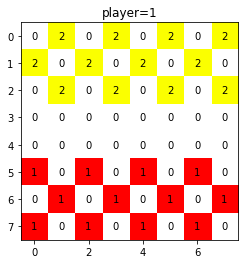

Time took for each move: 0.0078


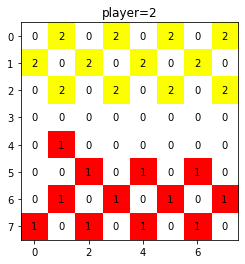

Time took for each move: 0.0017


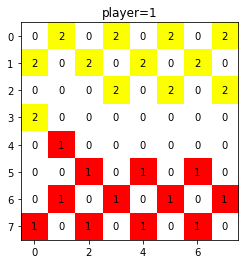

Time took for each move: 0.0081


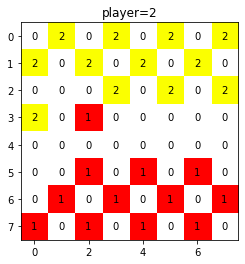

Time took for each move: 0.0017


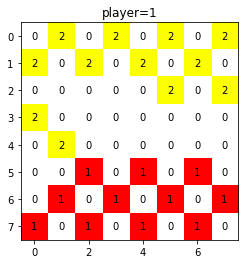

Time took for each move: 0.0074


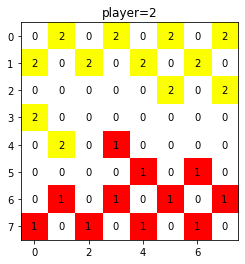

Time took for each move: 0.0022


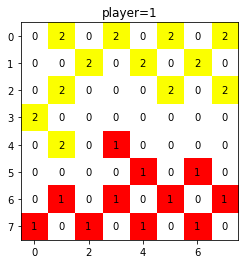

Time took for each move: 0.0109


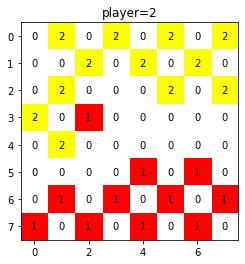

Time took for each move: 0.0024


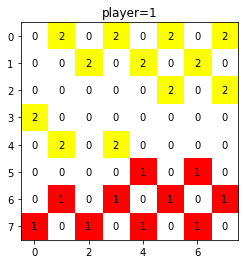

Time took for each move: 0.0089


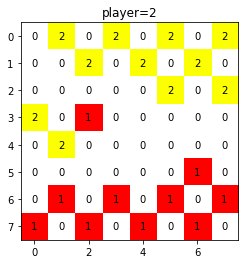

Time took for each move: 0.0023


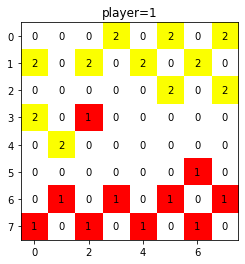

Time took for each move: 0.0119


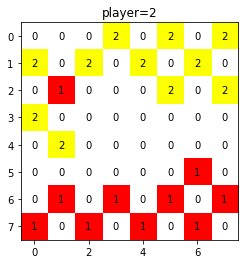

Time took for each move: 0.0017


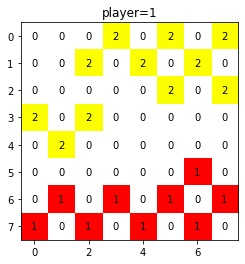

Time took for each move: 0.0089


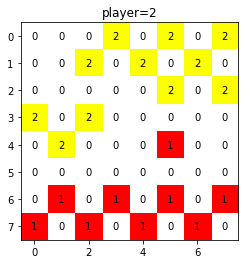

Time took for each move: 0.0023


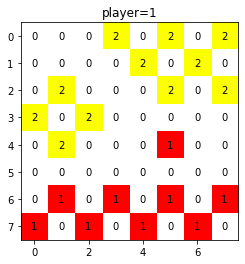

Time took for each move: 0.0108


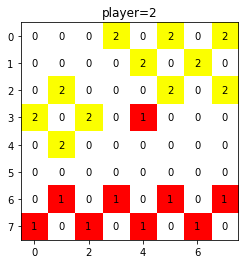

Time took for each move: 0.0017


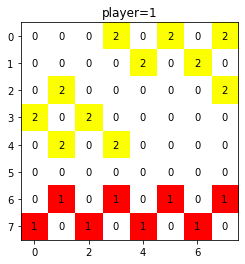

Time took for each move: 0.008


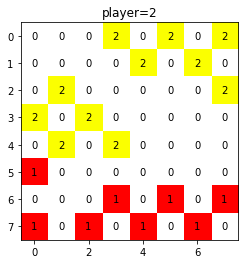

Time took for each move: 0.0017


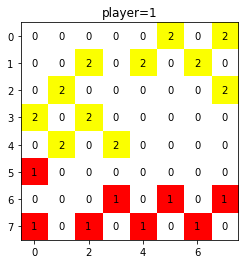

Time took for each move: 0.0077


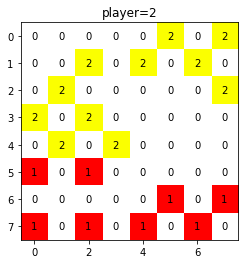

Time took for each move: 0.0016


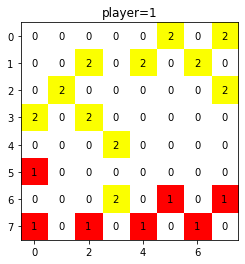

Time took for each move: 0.0095


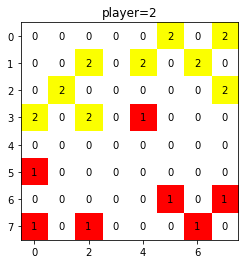

Time took for each move: 0.0019


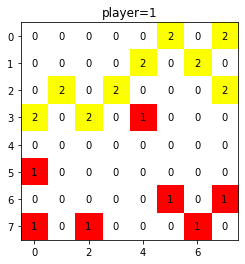

Time took for each move: 0.009


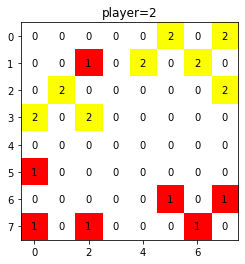

Time took for each move: 0.0017


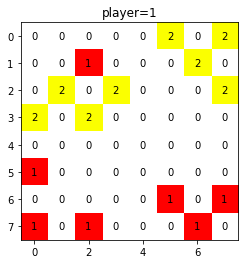

Time took for each move: 0.0115


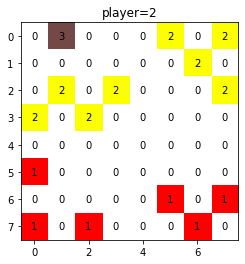

Time took for each move: 0.0023


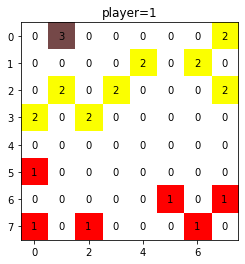

Time took for each move: 0.0131


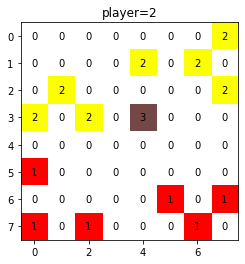

Time took for each move: 0.0027


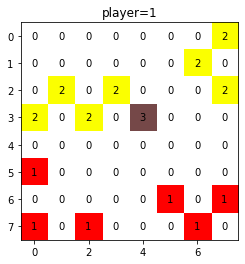

Time took for each move: 0.0172


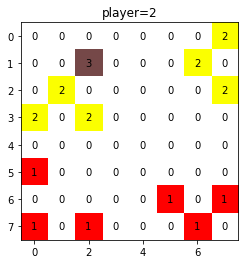

Time took for each move: 0.0017


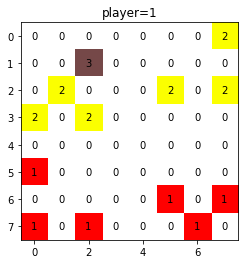

Time took for each move: 0.0172


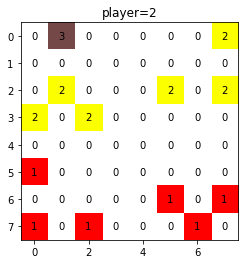

Time took for each move: 0.0023


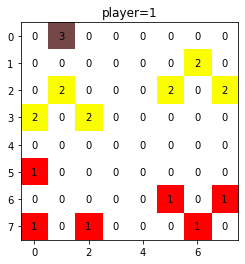

Time took for each move: 0.0148


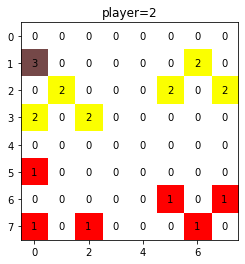

Time took for each move: 0.0016


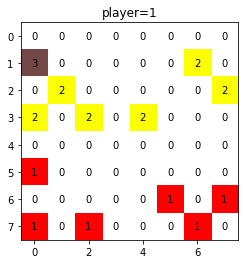

Time took for each move: 0.0089


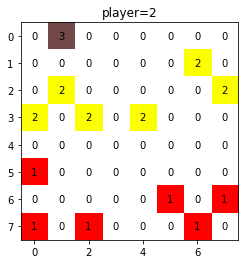

Time took for each move: 0.0023


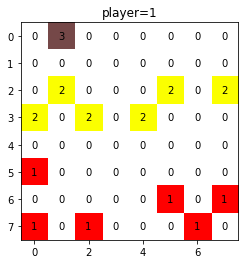

Time took for each move: 0.0143


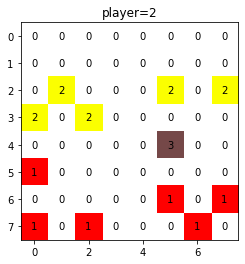

Time took for each move: 0.0023


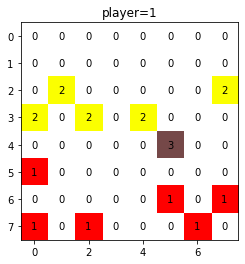

Time took for each move: 0.0123


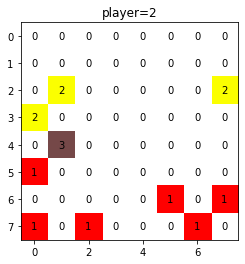

Time took for each move: 0.0009


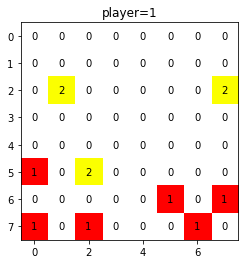

Time took for each move: 0.0047


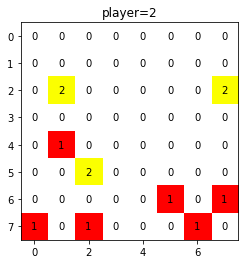

Time took for each move: 0.0011


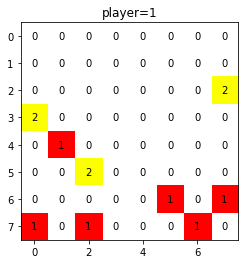

Time took for each move: 0.0032


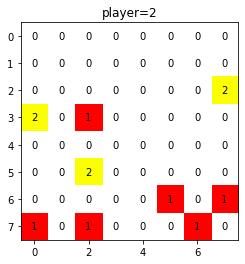

Time took for each move: 0.0009


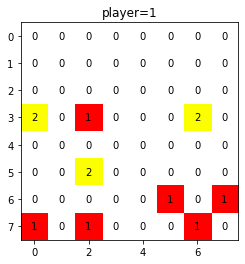

Time took for each move: 0.0056


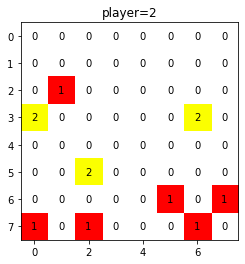

Time took for each move: 0.0011


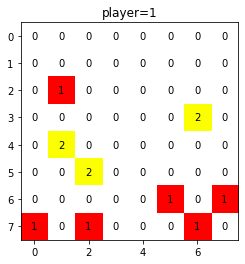

Time took for each move: 0.0058


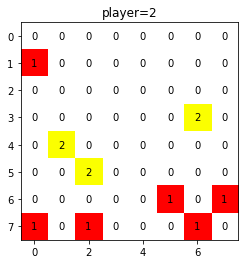

Time took for each move: 0.0011


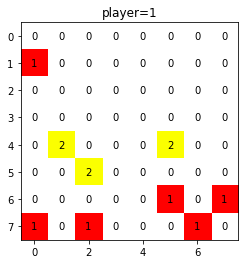

Time took for each move: 0.0051


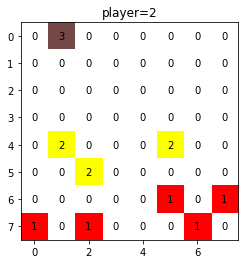

Time took for each move: 0.0016


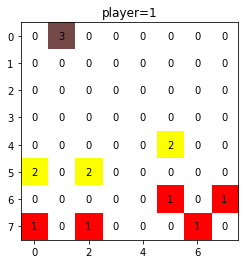

Time took for each move: 0.0093


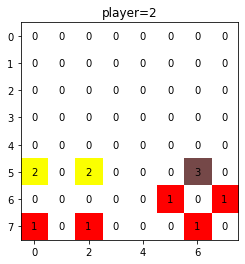

Time took for each move: 0.0008


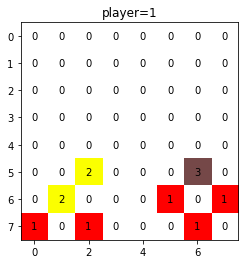

Time took for each move: 0.0034


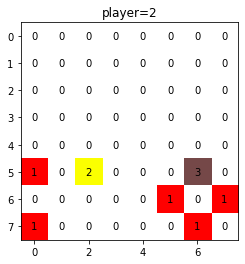

Time took for each move: 0.0006


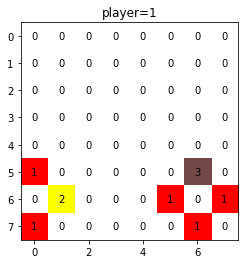

Time took for each move: 0.0032
1 Won!


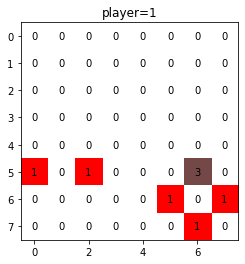

In [12]:
if __name__ == "__main__":
    startGame()
    
    '''board = np.zeros((8,8),int)
    board[0][3]=2
    board[5][3]=4
    board[2][3]=1
    board[7][3]=1
    printBoard(board,2)
    strr = time.time()
    for i in range(50000):
        random.random
        getPossibleMoves(random.randint(1,2),board)
    print(time.time()-strr)'''